# BIG DATA ANALYSIS - COURSEWORK1

## 1. Finding the descriptive statistics for temperature of each day of a given month for the year 2007

### 1.1 Data Acquisition

Firstly I downloaded the datasets from VLE and on my local terminal I wrote 'unzip.Datasets'. I chose '200707hourly.txt' dataset. In order to see the rows and columns in the dataset more clearly, I decided to convert the dataset from txt format to csv format.

In [66]:
import csv


txt_file_path = '200707hourly.txt'
csv_file_path = '200707hourly.csv'


with open(txt_file_path, 'r') as txt_file, open(csv_file_path, 'w', newline='') as csv_file:

    csv_writer = csv.writer(csv_file)
    

    for line in txt_file:
        fields = line.strip().split('\t')  # Adjust the split delimiter according to your txt file's structure
        csv_writer.writerow(fields)

After the txt to csv process, the dataset turned into a csv document consisting of just one column. I uploaded this csv dataset to my own PC and performed the following operations via Microsoft Excel and adjusted the rows and columns accordingly:
* 1- Selecting the 'Data' tab on the ribbon,
* 2- Selecting 'Tab to Columns'
* 3- 'Delimited'
* 4- Checking the box for 'Comma'
After these names, I converted the data to csv format appropriately.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("200707hourly.csv")

/var/folders/wl/n7pq_5rj1bz43l8jft3ps3q40000gp/T/ipykernel_6965/1873618796.py:1: DtypeWarning: Columns (16,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("200707hourly.csv")


In [5]:
df

,Wban Number,YearMonthDay,Time,Station Type,Maintenance Indicator,Sky Conditions,Visibility,Weather Type,Dry Bulb Temp,Dew Point Temp,...,Wind Speed (kt),Wind Direction,Wind Char. Gusts (kt),Val for Wind Char.,Station Pressure,Pressure Tendency,Sea Level Pressure,Record Type,Precip. Total,Unnamed: 21
0,3011,20070701,50,AO2,-,CLR,10SM,-,57,18,...,3,130,-,0,30.45,-,-,AA,-,NaN
1,3011,20070701,150,AO2,-,CLR,10SM,-,55,18,...,3,150,-,0,30.45,-,-,AA,-,NaN
2,3011,20070701,250,AO2,-,CLR,10SM,-,54,16,...,6,140,-,0,30.44,-,-,AA,-,NaN
3,3011,20070701,350,AO2,-,CLR,10SM,-,54,14,...,4,130,-,0,30.45,-,-,AA,-,NaN
4,3011,20070701,450,AO2,-,CLR,10SM,-,54,14,...,4,140,-,0,30.46,-,-,AA,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785801,96402,20070718,350,-,-,SCT040 BKN080 OVC110,10SM,-,-,-,...,0,0,-,0,29.8,-,-,AA,-,NaN
785802,96402,20070718,450,-,-,SCT040 BKN080 OVC110,10SM,-,-,-,...,0,0,-,0,29.79,-,-,AA,-,NaN
785803,96402,20070718,550,-,-,SCT040 BKN080 OVC110,10SM,-,-,-,...,0,0,-,0,29.79,-,-,AA,-,NaN
785804,96402,20070718,650,-,-,SCT040 BKN080 OVC110,10SM,-,-,-,...,0,0,-,0,29.77,-,-,AA,-,NaN


In [8]:
print(df.columns)


Index(['Wban Number', ' YearMonthDay', ' Time', ' Station Type',
       ' Maintenance Indicator', ' Sky Conditions', ' Visibility',
       ' Weather Type', ' Dry Bulb Temp', ' Dew Point Temp', ' Wet Bulb Temp',
       ' % Relative Humidity', ' Wind Speed (kt)', ' Wind Direction',
       ' Wind Char. Gusts (kt)', ' Val for Wind Char.', ' Station Pressure',
       ' Pressure Tendency', ' Sea Level Pressure', ' Record Type',
       ' Precip. Total', 'Unnamed: 21'],
      dtype='object')


### 1.2 Pseudo Codes for Mappers

#### 1.2.1 Mapper1.py 
•	The difference between the maximum and the minimum “Wind Speed” from all the weather stations for each day in the month:

In this pseudo code, 'Wban Number' columns are used for weather stations, 'YearMonthDay' for each day and 'Wind Speed (kt)' columns for wind speed.

#### 1.2.2 Mapper2.py
•	The daily minimum “Relative Humidity” from all the weather stations:

For this pseudo code, in addition to the 'Wban Number' and 'YearMonthDay' column used in the first question, the '% Relative Humidity' column is used for relative humidity.

#### 1.2.3 Mapper3.py
•	The daily mean and variance of “Dew Point Temp” from all the weather stations:

In this mapper, the 'Wban Number' and 'YearMonthDay' columns remained the same and the 'Dew Point Temp' column was used for the relevant analysis.

#### 1.2.4 Mapper4.py
•	The correlation matrix that describes the monthly correlation among “Relative Humidity”, “Wind Speed” and “Dry Bulb Temp” from all the weather stations:

For this mapper, the desired variables for the correlation matrix are included.

### 1.3 Psuedu Codes for Reducers

#### 1.3.1 Reducer1.py
•	The difference between the maximum and the minimum “Wind Speed” from all the weather stations for each day in the month:

Since the difference between the maximum and minimum wind speed is desired, the difference of the two values is taken in this reducer and written as the key value.

#### 1.3.2 Reducer2.py
• The daily minimum “Relative Humidity” from all the weather stations:

Daily minimum 'Relative Humidity' is calculated as key value.

#### 1.3.3 Reducer3.py
•	The daily mean and variance of “Dew Point Temp” from all the weather stations:

'Dew Point Temp'. Calculations specified in the project sheet were made for the daily mean and variance of the variable for each weather station.

#### 1.3.4 Reducer4.py
• The correlation matrix that describes the monthly correlation among “Relative Humidity”, “Wind Speed” and “Dry Bulb Temp” from all the weather stations:

Using the Pearson Correlation Coefficient, the correlation matrices of the three desired variables were created with function commands.

### 1.4 Defining Mappers and Reducers Paths

In [63]:
import os

current_working_directory = os.getcwd()
print("Current Working Directory:", current_working_directory)


mapper1_path = "/Users/alperenunal/Desktop/BigData/Assgn-1/MapReduce/mapper1.py"
mapper2_path = "/Users/alperenunal/Desktop/BigData/Assgn-1/MapReduce/mapper2.py"
mapper3_path = "/Users/alperenunal/Desktop/BigData/Assgn-1/MapReduce/mapper3.py"
mapper4_path = "/Users/alperenunal/Desktop/BigData/Assgn-1/MapReduce/mapper4.py"
reducer1_path = "/Users/alperenunal/Desktop/BigData/Assgn-1/MapReduce/reducer1.py"
reducer2_path = "/Users/alperenunal/Desktop/BigData/Assgn-1/MapReduce/reducer2.py"
reducer3_path = "/Users/alperenunal/Desktop/BigData/Assgn-1/MapReduce/reducer3.py"
reducer4_path = "/Users/alperenunal/Desktop/BigData/Assgn-1/MapReduce/reducer4.py"
dataset_csv_path= "/Users/alperenunal/Desktop/BigData/Assgn-1/MapReduce/200707hourly.csv"


Current Working Directory: /Users/alperenunal/Big Data/Assignment 1


### 1.5 Outputs

#### 1.5.1Output 1

•	The difference between the maximum and the minimum “Wind Speed” from all the weather stations for each day in the month:

In [56]:
import subprocess
# Construct the command to run
command = f"cat {dataset_csv_path} | python3 {mapper1_path} | sort | python3 {reducer1_path} | tail -n 20"

# Execute the command and capture the output
process = subprocess.run(command, capture_output=True, text=True, shell=True)

# Print the output, limiting to the last 20 lines
if process.stdout:
    print("Output:\n", process.stdout)
if process.stderr:
    print("Error Messages:\n", process.stderr)


Output:
 96401,20070717	10.0
96401,20070718	0.0
96402,20070701	5.0
96402,20070702	5.0
96402,20070703	4.0
96402,20070704	4.0
96402,20070705	6.0
96402,20070706	0.0
96402,20070707	4.0
96402,20070708	6.0
96402,20070709	4.0
96402,20070710	5.0
96402,20070711	8.0
96402,20070712	10.0
96402,20070713	6.0
96402,20070714	6.0
96402,20070715	10.0
96402,20070716	8.0
96402,20070717	4.0
96402,20070718	6.0



#### 1.5.2 Output 2

•	The daily minimum “Relative Humidity” from all the weather stations:

In [61]:
command = f"cat {dataset_csv_path} | python3 {mapper2_path} | sort | python3 {reducer2_path} | tail -n 20"

process = subprocess.run(command, capture_output=True, text=True, shell=True)

if process.stdout:
    print("Daily Minimum of Relative Humidity:\n", process.stdout)
if process.stderr:
    print("Error Messages:\n", process.stderr)


Daily Minimum of Relative Humidity:
 94998,20070717	39.0
94998,20070718	52.0
94999,20070701	58.0
94999,20070702	87.0
94999,20070703	77.0
94999,20070704	40.0
94999,20070705	49.0
94999,20070706	55.0
94999,20070707	57.0
94999,20070708	66.0
94999,20070709	50.0
94999,20070710	59.0
94999,20070711	53.0
94999,20070712	53.0
94999,20070713	54.0
94999,20070714	62.0
94999,20070715	50.0
94999,20070716	60.0
94999,20070717	63.0
94999,20070718	51.0



#### 1.5.3 Output 3
•	The daily mean and variance of “Dew Point Temp” from all the weather stations:

In [59]:
command = f"cat {dataset_csv_path} | python3 {mapper3_path} | sort | python3 {reducer3_path} | tail -n 20"

process = subprocess.run(command, capture_output=True, text=True, shell=True)

if process.stdout:
    print("Output:\n", process.stdout)
if process.stderr:
    print("Error Messages:\n", process.stderr)

Output:
 94998,20070717	66.66666666666667	3.2222222222220203
94998,20070718	67.9090909090909	7.082644628098933
94999,20070701	57.5	28.833333333333332
94999,20070702	62.95652173913044	25.08506616257111
94999,20070703	67.75	31.770833333333332
94999,20070704	60.916666666666664	26.90972222222202
94999,20070705	61.69565217391305	12.124763705103998
94999,20070706	60.041666666666664	32.95659722222202
94999,20070707	68.29166666666667	76.53993055555536
94999,20070708	69.70833333333333	29.789930555555355
94999,20070709	59.75	6.520833333333333
94999,20070710	58.0	13.833333333333334
94999,20070711	54.375	5.234375
94999,20070712	52.416666666666664	13.826388888888687
94999,20070713	55.041666666666664	82.12326388888869
94999,20070714	58.958333333333336	5.539930555555354
94999,20070715	56.625	23.567708333333332
94999,20070716	61.833333333333336	9.388888888888687
94999,20070717	66.08333333333333	33.99305555555535
94999,20070718	63.31818181818182	16.398760330578213



#### 1.5.4 Output 4
• The correlation matrix that describes the monthly correlation among “Relative Humidity”, “Wind Speed” and “Dry Bulb Temp” from all the weather stations:

In [60]:
command = f"cat {dataset_csv_path} | python3 {mapper4_path} | sort | python3 {reducer4_path} | tail -n 20"

process = subprocess.run(command, capture_output=True, text=True, shell=True)

if process.stdout:
    print("Output:\n", process.stdout)
if process.stderr:
    print("Error Messages:\n", process.stderr)

Output:
 94973	-0.5992014826652557	-0.7397526782927879	0.3933506189672141
94974	-0.550433720138871	-0.6552066863043948	0.32631153950142944
94975	-0.2978841891544884	-0.8575551875149446	0.3139832015574384
94976	-0.49226257309000304	-0.6140404364671108	0.3254569075108478
94977	-0.46731355893754106	-0.8415459016714644	0.44919413644938716
94978	-0.4967787176874852	-0.8465720580121692	0.4572237776542308
94979	-0.2786008464452675	-0.6518751050856418	0.35354113144204435
94982	-0.24358723734316023	-0.6605835661735721	0.3209313649889729
94985	-0.5042136382768406	-0.5726984832462115	0.25581104152373135
94986	-0.49338776964668174	-0.5235121223060971	0.4269842219472103
94988	-0.5091607781487568	-0.7064777491616554	0.40694273654837887
94989	-0.5343994306451241	-0.7336026271218099	0.4775005502672471
94990	-0.13813579229489753	-0.9081046918899859	0.27294646667310085
94991	-0.42680906803250973	-0.7728753399571313	0.48471878423400805
94992	-0.2682932309071821	-0.8457646128509774	0.17586839239183802
949

### 1.6 Limitations of Map-Reduce

MapReduce is a powerful and scalable model for processing large datasets, yet it has certain limitations:

* Rigid Data Flow: The MapReduce workflow consists of two main steps (map and reduce), which can be insufficient for some processing models. For complex data processing needs, running multiple MapReduce jobs sequentially may be necessary, leading to efficiency and performance losses.

* Disk I/O Cost: The need to write intermediate results to disk can significantly reduce performance, especially when working with large datasets.

* Lack of Real-Time Processing: MapReduce is based on a batch processing model and is not suitable for real-time data processing. Applications requiring real-time analysis should consider alternative technologies.

* Configuration and Management Complexity: Large and complex Hadoop cluster configurations can make management difficult and increase operational costs.

These limitations indicate that MapReduce is not ideal for every type of data processing scenario. However, it remains a powerful and valuable tool for specific situations and requirements.

## 2. Cluster Analysis using Apache Mahout

### 2.1 Mahout Calculation

Creating sequence files from raw text.
* mahout seqdirectory -i docs -o docs-seqfiles -c UTF-8 -chunk 5
Generating TF and TF-IDF vectors:
* mahout seq2sparse -nv -i docs-seqfiles -o docs-vectors

For these measures, I use 'western_classics' dataset and in addition to this 'books.txt' from our lecture

### 2.2 Squared Euclidean Distance Measures with Different K values

After the steps above, we need generate 'canopies' with Euclidean Distance Measure for K-Means on DSM1 the first command is:

##### mahout canopy -i docs-vectors/tfidf-vectors -o canopy-centroids-sq-euclidean -dm org.apache.mahout.common.distance.SquaredEuclideanDistanceMeasure -t1 1500 -t2 2000

#### 2.2.1 K=1

* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-sq-euclidean -o docs-kmeans-clusters-sq-euclidean-k1 -dm org.apache.mahout.common.distance.SquaredEuclideanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 1

* hadoop fs -ls docs-kmeans-clusters-sq-euclidean-k1

* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-sq-euclidean-k1/clusters-3-final -o clusters-sq-euc-k1.txt -b 100 -p docs-kmeans-clusters-sq-euclidean-k1/clusteredPoints -n 20 --evaluate

* tail ./clusters-sq-euc-k1.txt

After these commands above, we run K-Means algorithm for k=1 and we created a cluster for euclidean measure. After checking final iteration we created the txt file with statistical evaluation lines at the end of the txt file.
##### Inter-Cluster Density: NaN
##### Intra-Cluster Density: 0.6603071501779987

#### 2.2.2 K=3

* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-sq-euclidean -o docs-kmeans-clusters-sq-euclidean-k3 -dm org.apache.mahout.common.distance.SquaredEuclideanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 3
* hadoop fs -ls docs-kmeans-clusters-sq-euclidean-k3
* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-sq-euclidean-k3/clusters-3-final -o clusters-sq-euc-k3.txt -b 100 -p docs-kmeans-clusters-sq-euclidean-k3/clusteredPoints -n 20 --evaluate
* tail ./clusters-sq-euc-k3.txt

##### Inter-Cluster Density: 0.4349088337247659
##### Intra-Cluster Density: 0.5654190860115158

#### 2.2.3 K=5

* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-sq-euclidean -o docs-kmeans-clusters-sq-euclidean-k5 -dm org.apache.mahout.common.distance.SquaredEuclideanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 5
* hadoop fs -ls docs-kmeans-clusters-sq-euclidean-k5
* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-sq-euclidean-k5/clusters-3-final -o clusters-sq-euc-k5.txt -b 100 -p docs-kmeans-clusters-sq-euclidean-k5/clusteredPoints -n 20 --evaluate
* tail ./clusters-euc-k5.txt

##### Inter-Cluster Density: 0.43697089107424475
##### Intra-Cluster Density: 0.5693756016100209

#### 2.2.4 K=7
* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-sq-euclidean -o docs-kmeans-clusters-sq-euclidean-k7 -dm org.apache.mahout.common.distance.SquaredEuclideanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 7

* hadoop fs -ls docs-kmeans-clusters-sq-euclidean-k7

* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-sq-euclidean-k7/clusters-4-final -o clusters-sq-euc-k7.txt -b 100 -p docs-kmeans-clusters-sq-euclidean-k7/clusteredPoints -n 20 --evaluate

* tail ./clusters-sq-euc-k7.txt
##### Inter-Cluster Density: 0.4177968555166761
###### Intra-Cluster Density: 0.514249636581122

#### 2.2.5 K=10
* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-sq-euclidean -o docs-kmeans-clusters-sq-euclidean-k10 -dm org.apache.mahout.common.distance.SquaredEuclideanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 10

* hadoop fs -ls docs-kmeans-clusters-sq-euclidean-k10

* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-sq-euclidean-k10/clusters-3-final -o clusters-euc-k10.txt -b 100 -p docs-kmeans-clusters-sq-euclidean-k10/clusteredPoints -n 20 --evaluate

* tail ./clusters-sq-euc-k10.txt
##### Inter-Cluster Density: 0.3989316506179806
##### Intra-Cluster Density: 0.6572495524032275

The Euclidean distance results for varying k values indicate that k=5 offers the optimal balance between well-defined, separate clusters and closely packed clusters within each group. This balance is highlighted by the highest Intra-Cluster Density and a significant Inter-Cluster Density at k=5, suggesting an effective clustering scenario. While k=1 presents a single, compact cluster, and k=10 shows diminished cluster compactness and separation, k=5 emerges as the preferred choice for achieving both clarity in cluster definition and density. Nonetheless, the choice of the best k value should also consider the specific characteristics of the dataset and the objectives of the clustering analysis, ensuring that any decision aligns with the particular needs of the data analysis.

### 2.3 Manhattan Distance Measures with Different K values

For generating 'canopies' with Manhattan Distance Measure on DSM1 the first command is:
##### mahout canopy -i docs-vectors/tfidf-vectors -o canopy-centroids-manhattan -dm org.apache.mahout.common.distance.ManhattanDistanceMeasure -t1 1500 -t2 2000

#### 2.3.1 K=1
* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-manhattan -o docs-kmeans-clusters-manhattan-k1 -dm org.apache.mahout.common.distance.ManhattanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 1

* hadoop fs -ls docs-kmeans-clusters-manhattan-k1

* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-manhattan-k1/clusters-3-final -o clusters-man-k1.txt -b 100 -p docs-kmeans-clusters-manhattan-k1/clusteredPoints -n 20 --evaluate

* tail ./clusters-man-k1.txt
##### Inter-Cluster Density: NaN
##### Intra-Cluster Density: 0.6603071501779987



#### 2.3.2 K=3
* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-manhattan -o docs-kmeans-clusters-manhattan-k3 -dm org.apache.mahout.common.distance.ManhattanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 3

* hadoop fs -ls docs-kmeans-clusters-manhattan-k3

* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-manhattan-k3/clusters-3-final -o clusters-man-k3.txt -b 100 -p docs-kmeans-clusters-manhattan-k3/clusteredPoints -n 20 --evaluate

* tail ./clusters-man-k3.txt
##### Inter-Cluster Density: 0.409480527330526
##### Intra-Cluster Density: 0.6566780620584004

#### 2.3.3 K=5
* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-manhattan -o docs-kmeans-clusters-manhattan-k5 -dm org.apache.mahout.common.distance.ManhattanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 5

* hadoop fs -ls docs-kmeans-clusters-manhattan-k5

* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-manhattan-k5/clusters-3-final -o clusters-man-k5.txt -b 100 -p docs-kmeans-clusters-manhattan-k5/clusteredPoints -n 20 --evaluate

* tail ./clusters-man-k5.txt
##### Inter-Cluster Density: 0.48013343187985164
##### Intra-Cluster Density: 0.5257533230286466

#### 2.3.4 K=7
* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-manhattan -o docs-kmeans-clusters-manhattan-k7 -dm org.apache.mahout.common.distance.ManhattanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 7

* hadoop fs -ls docs-kmeans-clusters-manhattan-k7

* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-manhattan-k7/clusters-5-final -o clusters-man-k7.txt -b 100 -p docs-kmeans-clusters-manhattan-k7/clusteredPoints -n 20 --evaluate

* tail ./clusters-man-k7.txt
##### Inter-Cluster Density: 0.47984379417391576
##### Intra-Cluster Density: 0.602641375733723

#### 2.3.5 K=10
* mahout kmeans -i docs-vectors/tfidf-vectors -c canopy-centroids-manhattan -o docs-kmeans-clusters-manhattan-k10 -dm org.apache.mahout.common.distance.ManhattanDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 10

* hadoop fs -ls docs-kmeans-clusters-manhattan-k10

* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-manhattan-k10/clusters-3-final -o clusters-man-k10.txt -b 100 -p docs-kmeans-clusters-manhattan-k10/clusteredPoints -n 20 --evaluate

* tail ./clusters-man-k10.txt
##### Inter-Cluster Density: 0.3990329948984028
##### Intra-Cluster Density: 0.5843788907180333

The Manhattan distance results suggest k=7 as a balanced choice for clustering, with a good mix of inter-cluster separation and intra-cluster tightness. k=3 is also notable for similar reasons but with slightly more emphasis on cluster distinction. While k=10 shows the best cluster separation, it lacks the internal compactness of clusters seen in k=7 and k=3. Thus, k=7 and k=3 are identified as optimal for achieving a balance between defining distinct clusters and maintaining cohesion within clusters, with the final selection dependent on specific data characteristics and analysis goals.

## 2.4 Cosine Distance Measure

While creating a 'canopy' for cosine distance measure, unlike Euclidian and Manhattan measure distance, we created ten different clusters with ten k values from one to ten. The reason for this was to better observe the relationship between the average distance to the centroid and the k value. Therefore, as an example, we explained step by step the formation process of clusters created with four different k values.
##### mahout canopy -i docs-vectors/tfidf-vectors -ow -o docs-vectors/docs-canopy-centroids -dm org.apache.mahout.common.distance.CosineDistanceMeasure -t1 1500 -t2 2000

#### 2.4.1 K=1

* mahout kmeans -i docs-vectors/tfidf-vectors -c docs-canopy-centroids -o docs-kmeans-clusters-k1 -dm org.apache.mahout.common.distance.CosineDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 1   
* hadoop fs -ls docs-kmeans-clusters-k1
* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-k1/clusters-2-final -o clusters-k1.txt -b 100 -p docs-kmeans-clusters-k1/clusteredPoints -n 20 --evaluate
* tail ./clusters-k1.txt
##### Inter-Cluster Density: NaN
##### Intra-Cluster Density: 0.6603071501779987

#### 2.4.2 K=2
* mahout kmeans -i docs-vectors/tfidf-vectors -c docs-canopy-centroids -o docs-kmeans-clusters-k2 -dm org.apache.mahout.common.distance.CosineDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 2
* hadoop fs -ls docs-kmeans-clusters-k2
* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-k2/clusters-2-final -o clusters-k2.txt -b 100 -p docs-kmeans-clusters-k2/clusteredPoints -n 20 --evaluate
* tail ./clusters-k2.txt
##### Inter-Cluster Density: NaN
##### Intra-Cluster Density: 0.609020994020959

#### 2.4.3 K=3 
* mahout kmeans -i docs-vectors/tfidf-vectors -c docs-canopy-centroids -o docs-kmeans-clusters-k3 -dm org.apache.mahout.common.distance.CosineDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 3
* hadoop fs -ls docs-kmeans-clusters-k3
* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-k3/clusters-2-final -o clusters-k3.txt -b 100 -p docs-kmeans-clusters-k3/clusteredPoints -n 20 --evaluate
* tail ./clusters-k3.txt
##### Inter-Cluster Density: 0.4867451222238232
##### Intra-Cluster Density: 0.6357191058366416

#### 2.4.4 K=4
* mahout kmeans -i docs-vectors/tfidf-vectors -c docs-canopy-centroids -o docs-kmeans-clusters-k4 -dm org.apache.mahout.common.distance.CosineDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 4
* hadoop fs -ls docs-kmeans-clusters-k4
* mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters-k4/clusters-2-final -o clusters-k4.txt -b 100 -p docs-kmeans-clusters-k4/clusteredPoints -n 20 --evaluate
* tail ./clusters-k4.txt
##### Inter-Cluster Density: 0.4934554149849282
##### Intra-Cluster Density: 0.5916430954776636

#### K=5
##### Inter-Cluster Density: 0.5952716202091901
##### Intra-Cluster Density: 0.5855042816995901

#### K=6
##### Inter-Cluster Density: 0.5964930640984843

##### Intra-Cluster Density: 0.5574720188824531
#### K=7
##### Inter-Cluster Density: 0.4364813198604249
##### Intra-Cluster Density: 0.5696287464515573
#### K=8
##### Inter-Cluster Density: 0.35985184446654656
##### Intra-Cluster Density: 0.5475008532800699
#### K=9
##### Inter-Cluster Density: 0.2947027856108523
##### Intra-Cluster Density: 0.5370047583442
#### K=10
##### Inter-Cluster Density: 0.5208913016563401
##### Intra-Cluster Density: 0.5298341640294627

### 2.5 Table of Distance Measures

In [37]:
import pandas as pd
import numpy as np

# Data for the distance measures
data = {
    'k': [1, 3, 5, 7, 10] + [1, 3, 5, 7, 10] + [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Distance Measure': ['Squared Euclidean'] * 5 + ['Manhattan'] * 5 + ['Cosine'] * 10,
    'Inter-Cluster Density': [np.nan, 0.4349088337247659, 0.43697089107424475, 0.4177968555166761, 0.3989316506179806,
                              np.nan, 0.409480527330526, 0.48013343187985164, 0.47984379417391576, 0.3990329948984028,
                              np.nan, np.nan, 0.4867451222238232, 0.4934554149849282, 0.5952716202091901, 0.5964930640984843,
                              0.4364813198604249, 0.35985184446654656, 0.2947027856108523, 0.5208913016563401],
    'Intra-Cluster Density': [0.6603071501779987, 0.5654190860115158, 0.5693756016100209, 0.514249636581122, 0.6572495524032275,
                              0.6603071501779987, 0.6566780620584004, 0.5257533230286466, 0.602641375733723, 0.5843788907180333,
                              0.6603071501779987, 0.609020994020959, 0.6357191058366416, 0.5916430954776636, 0.5855042816995901,
                              0.5574720188824531, 0.5696287464515573, 0.5475008532800699, 0.5370047583442, 0.5298341640294627]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Pivoting the DataFrame to have distance measures as columns and k values as rows
table = pd.pivot_table(df, values=['Inter-Cluster Density', 'Intra-Cluster Density'], index='k',
                       columns=['Distance Measure'], aggfunc=np.sum)

# Filling NaN values with ''
table = table.fillna('')
table


Inter-Cluster Density                              \
Distance Measure                Cosine Manhattan Squared Euclidean   
k                                                                    
1                             0.000000       0.0               0.0   
2                             0.000000                               
3                             0.486745  0.409481          0.434909   
4                             0.493455                               
5                             0.595272  0.480133          0.436971   
6                             0.596493                               
7                             0.436481  0.479844          0.417797   
8                             0.359852                               
9                             0.294703                               
10                            0.520891  0.399033          0.398932   

                 Intra-Cluster Density                              
Distance Measure                Cosine Manhattan Squared Euclidean  
k                                                                   
1                             0.660307  0.660307          0.660307  
2                             0.609021                              
3                             0.635719  0.656678          0.565419  
4                             0.591643                              
5                             0.585504  0.525753          0.569376  
6                             0.557472                              
7                             0.569629  0.602641           0.51425  
8                             0.547501                              
9                             0.537005                              
10                            0.529834  0.584379           0.65725

### 2.6 Calculating Average Distance to the Centroid and Making Elbow Graphs

#### 2.6.1 Calculation

Both the cluster data and the centroids' positions are typically required to calculate the average distance to the centroid accurately. We need to find the coordinates of the centroids from the data files and calculate the distance to their assigned centroid. First, let's access the file that will provide us with these parameters via HDFS.

Since we will apply the same process for all K values from one to ten, I will explain how to access the file containing the necessary parameters for the first three different K values as an example:

#### K=1

We will use the mahout seqdumper command to read Hadoop SequenceFiles, then we will create an output of the same document in txt format.
We will access the 'clustredPoints' file in each cluster created using cosine distance measure. Then, we will read the 'part-m-00000' document in this file with the 'seqdumper' command and save it as  'clusters-dump-k1-cosine.txt'.

* mahout seqdumper -i docs-kmeans-clusters-k1/clusteredPoints/part-m-00000 -o clusters-dump-k1-cosine.txt

After this step, we download the txt from DSM1 to our local system. We will upload this txt file to the Jupyter Notebook as a dataset for coding to calculate average distance:


#### K=2

* mahout seqdumper -i docs-kmeans-clusters-k2/clusteredPoints/part-m-00000 -o clusters-dump-k2-cosine.txt

#### K=3

* mahout seqdumper -i docs-kmeans-clusters-k3/clusteredPoints/part-m-00000 -o clusters-dump-k3-cosine.txt


In [31]:
import re

# Defining a function to calculate the average distance to centroid
def calculate_average_distance(cluster_content):
    distance_pattern = re.compile(r'distance: ([\d\.]+)')
    distances = [float(match) for match in distance_pattern.findall(cluster_content)]
    return sum(distances) / len(distances) if distances else None

# Placeholder for average distances
average_distances = {}

# Looping over k values
for k in range(1, 11):
    file_path = f'clusters-dump-k{k}-cosine.txt'
    with open(file_path, 'r') as file:
        content = file.read()
    average_distances[k] = calculate_average_distance(content)

# Printing the average distances for each k
for k, avg_dist in average_distances.items():
    print(f'Average distance to centroid for K={k}: {avg_dist}')


Average distance to centroid for K=1: 0.4718422868578967
Average distance to centroid for K=2: 0.4438590266696518
Average distance to centroid for K=3: 0.4243936629462605
Average distance to centroid for K=4: 0.3798356860910371
Average distance to centroid for K=5: 0.3775271934633072
Average distance to centroid for K=6: 0.4244388923243989
Average distance to centroid for K=7: 0.3065400578768741
Average distance to centroid for K=8: 0.29033712135149736
Average distance to centroid for K=9: 0.4797763009155531
Average distance to centroid for K=10: 0.252618786628607


#### 2.6.2 Elbow Graphs

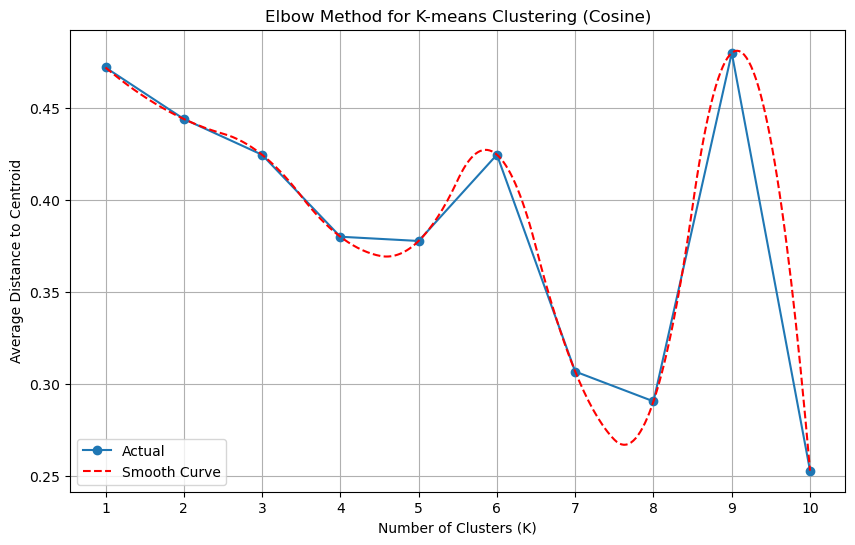

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Values for k and average distances
k_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
average_distances = np.array([0.4718422868578967, 0.4438590266696518, 0.4243936629462605, 0.3798356860910371,
                              0.3775271934633072, 0.4244388923243989, 0.3065400578768741, 0.29033712135149736,
                              0.4797763009155531, 0.252618786628607])

# Generating values for a smooth curve
k_values_smooth = np.linspace(k_values.min(), k_values.max(), 300)
spl = make_interp_spline(k_values, average_distances, k=2)
smooth_distances = spl(k_values_smooth)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_distances, 'o-', label='Actual')
plt.plot(k_values_smooth, smooth_distances, 'r--', label='Smooth Curve') 
plt.title('Elbow Method for K-means Clustering (Cosine)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Distance to Centroid')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 11))  # X-ticks for each integer value of K
plt.show()


The graph depicts the Elbow Method for K-means clustering using the Cosine measure. The 'elbow' is where the rate of decrease sharply changes, indicating the optimal number of clusters, K. The actual data points show fluctuations, but the smooth curve, which is a general trend line, provides a clearer view of the elbow.

From the smooth curve, we can observe that the average distance to the centroid significantly drops from K=1 to K=2, continues to decrease at a slower rate up to K=4, slightly increases at K=5, and then decreases again up to K=7. At K=8, there is a notable increase, followed by a sharp drop at K=9, reaching the lowest point at K=10.

The optimal K is typically where the elbow is most pronounced — the point after which diminishing returns are observed. This is typically where the graph starts to level off. In this graph, the elbow seems to appear around K=5 or K=7. However, due to the unusual increase at K=8, it might suggest that K=7 is a local optimum, and the true 'elbow' could be at K=10, given that K=10 has the lowest average distance to the centroid, indicating tight clustering.

Thus, both K=7 and K=10 could be considered optimal depending on the specific context and requirements of the clustering. K=7 for a balance between cluster tightness and a manageable number of clusters, or K=10 for the tightest clustering as per the provided data. The final selection should also consider the practical application and interpretability of the clusters in the context of the data being analyzed.

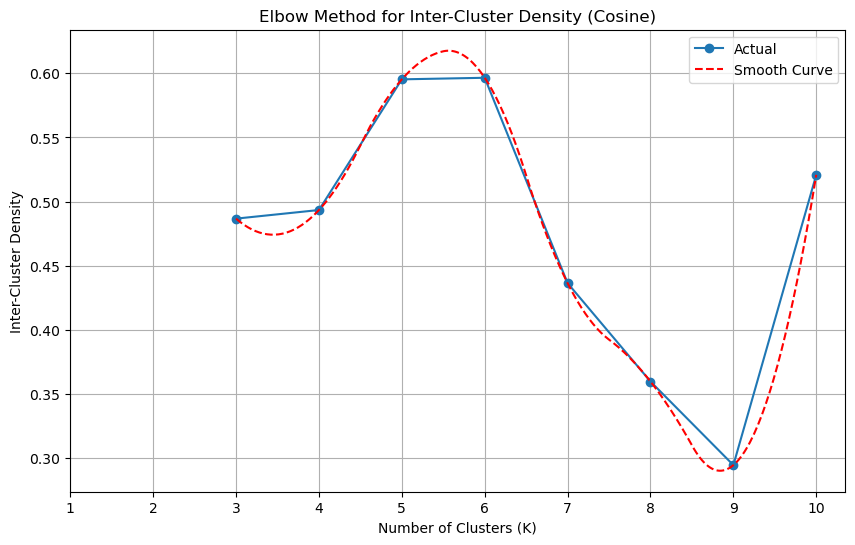

In [25]:
# Since the inter-cluster density values for k=1 and k=2 are NaN, we create the graph without including these values.

k_values = np.array([3, 4, 5, 6, 7, 8, 9, 10])
inter_cluster_density= np.array([0.4867451222238232, 0.4934554149849282, 0.5952716202091901, 0.5964930640984843,
                              0.4364813198604249, 0.35985184446654656, 0.2947027856108523, 0.5208913016563401,
                              ])


k_values_smooth = np.linspace(k_values.min(), k_values.max(), 300)
spl = make_interp_spline(k_values, inter_cluster_density, k=2)
smooth_density = spl(k_values_smooth)


plt.figure(figsize=(10, 6))
plt.plot(k_values, inter_cluster_density, 'o-', label='Actual')
plt.plot(k_values_smooth, smooth_density, 'r--', label='Smooth Curve') 
plt.title('Elbow Method for Inter-Cluster Density (Cosine)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inter-Cluster Density')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 11)) 
plt.show()


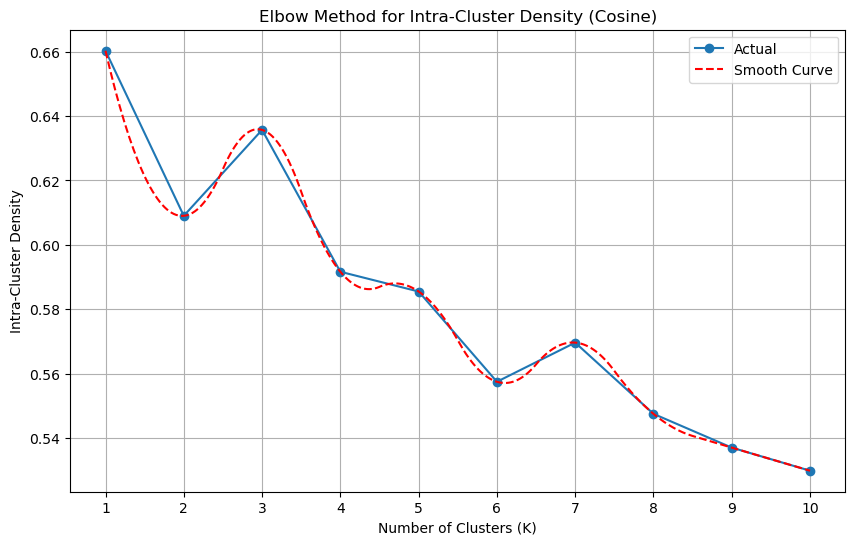

In [23]:
k_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
intra_cluster_density= np.array([0.6603071501779987, 0.609020994020959, 0.6357191058366416, 0.5916430954776636,
                               0.5855042816995901, 0.5574720188824531, 0.5696287464515573, 0.5475008532800699,
                               0.5370047583442, 0.5298341640294627])


k_values_smooth = np.linspace(k_values.min(), k_values.max(), 300)
spl = make_interp_spline(k_values, intra_cluster_density, k=2)
smooth_density = spl(k_values_smooth)


plt.figure(figsize=(10, 6))
plt.plot(k_values, intra_cluster_density, 'o-', label='Actual')
plt.plot(k_values_smooth, smooth_density, 'r--', label='Smooth Curve') 
plt.title('Elbow Method for Intra-Cluster Density (Cosine)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Intra-Cluster Density')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()


The Elbow Method graph for Inter-Cluster Density shows a peak at k=5, indicating that up to this point, each additional cluster significantly contributes to separating different clusters. After k=5, the density starts to drop, suggesting a decrease in the distinction between clusters. The Intra-Cluster Density graph, however, dips at k=5 and then peaks again at k=7, suggesting that the clusters are most compact at k=7. The Average Distance to Centroid graph sharply falls after k=7, suggesting that the clusters become less distinct from each other as k increases.

Considering all these graphs, the optimal k value is not straightforward. While k=5 is indicated as optimal by the Inter-Cluster Density, the Intra-Cluster Density suggests k=7 might be better due to tighter clusters. However, since the Average Distance to Centroid increases significantly after k=7, this indicates that the clusters are very distinct at k=7. The optimal k value, therefore, would depend on whether the goal is to maximize the difference between clusters (k=5) or within-cluster compactness (k=7). If both are equally important, k=6 might represent a balance between the two, albeit not the best for either measure. The specific context of the clustering exercise should guide the final decision.

### 2.7 Differencies between Squared Euclidean, Manhattan and Cosine Distance Measures

The best distance measurement for a dataset with text such as novels depends on the data characteristics and the application of the distance calculations. Cosine distance is often preferred for high-dimensional text data since it measures the angular difference between vectors, which is useful for capturing the similarity of documents without being affected by their length. Squared Euclidean distance emphasizes larger differences and may not scale well with text data. Manhattan distance measures the absolute differences and might be robust to outliers but is less common for text analysis. Ultimately, cosine distance is likely the most suitable for text datasets.

Therefore, in this project, it is necessary to examine the cosine distance measure data more carefully and more deeply. Making our analyzes based on cosine distance measure will give us more accurate results.

## 3. References

White T (2015) Hadoop: The definitive guide. O’Reilly, Beijing

Filho, D.S.M.P., de Macedo, D. & Dutra, M.L. Technological Surveillance in Big Data Environments by using a MapReduce-based Method. Mobile Netw Appl 27, 1931–1940 (2022). https://doi.org/10.1007/s11036-022-01962-2

Dean J, Ghemawat S (2008) MapReduce: Simplified data processing on large clusters. Commun ACM 51(1):107–113

Duque Barrachina, A., & O’Driscoll, A. (2014). A big data methodology for categorising technical support requests using Hadoop and Mahout. In Journal Of Big Data (Vol. 1, Issue 1). Springer Science and Business Media LLC. https://doi.org/10.1186/2196-1115-1-1

Sumathi, S., & Gunaseelan, H. G. (2022). A Review of Data and Document Clustering pertaining to various Distance Measures. In Salud, Ciencia y Tecnología (Vol. 2, Issue S2, p. 194). Salud, Ciencia y Tecnologia. https://doi.org/10.56294/saludcyt2022194

Sahu, L., & Mohan, B. R. (2014). An improved K-means algorithm using modified cosine distance measure for document clustering using Mahout with Hadoop. In 2014 9th International Conference on Industrial and Information Systems (ICIIS). 2014 9th International Conference on Industrial and Information Systems (ICIIS). IEEE. https://doi.org/10.1109/iciinfs.2014.7036661